In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#reading zomato.csv
zomato = pd.read_csv("zomato.csv")

In [29]:
zom = zomato.drop(columns=["url","address","name","phone","reviews_list","menu_item"])

In [5]:
zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-null object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [6]:
zom.isnull().sum()

online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
zom.head(1)

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari


In [12]:
#getting column names
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [13]:
#checking for duplicated values
zomato.duplicated().sum()

0

In [22]:
#percentage of missing data
pd.DataFrame(round(zomato.isnull().sum()/zomato.shape[0]*100,3), columns = ["Missing"])

,Missing
url,0.000
address,0.000
name,0.000
online_order,0.000
book_table,0.000
rate,15.034
votes,0.000
phone,2.336
location,0.041
rest_type,0.439


In [18]:
zomato.shape[0]

51717

In [30]:
#removing unwanted columns
zomato.drop(columns=["url","name","phone","address"],inplace=True)

In [31]:
#renaming columns
zomato.rename(columns={"approx_cost(for two people)": "cost_two", "listed_in(type)":"service_type", "listed_in(city)":"serve_to"}, inplace = True)


In [33]:
zomato.head(1)

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [50]:
zomato.dtypes

online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
dish_liked      object
cuisines        object
cost_two         int64
reviews_list    object
menu_item       object
service_type    object
serve_to        object
dtype: object

In [48]:
#replacing ',' with ''
zomato["cost_two"] = zomato["cost_two"].str.replace(',',"")
#replacing null values with 0
zomato["cost_two"].fillna(0,inplace=True)
#converting datatype to integer
zomato["cost_two"] = zomato["cost_two"].astype('int64')

In [49]:
zomato["cost_two"] = zomato["cost_two"].astype('int64')



In [51]:
#visualising data
#setting defaults
plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['figure.dpi'] = 150

In [65]:
zomato.rate = zomato.rate.str.replace('/5','')


In [67]:
zomato.rate = zomato.rate.str.replace('.','')

In [77]:
def chk_int(x):
    if type(str(x)) != 'int':
        return True

In [80]:
zomato.rate = pd.to_numeric(zomato.rate,errors="coerce")

In [82]:
zomato.rate.fillna(0,inplace=)

In [85]:
zomato.rate = zomato.rate.astype('int')

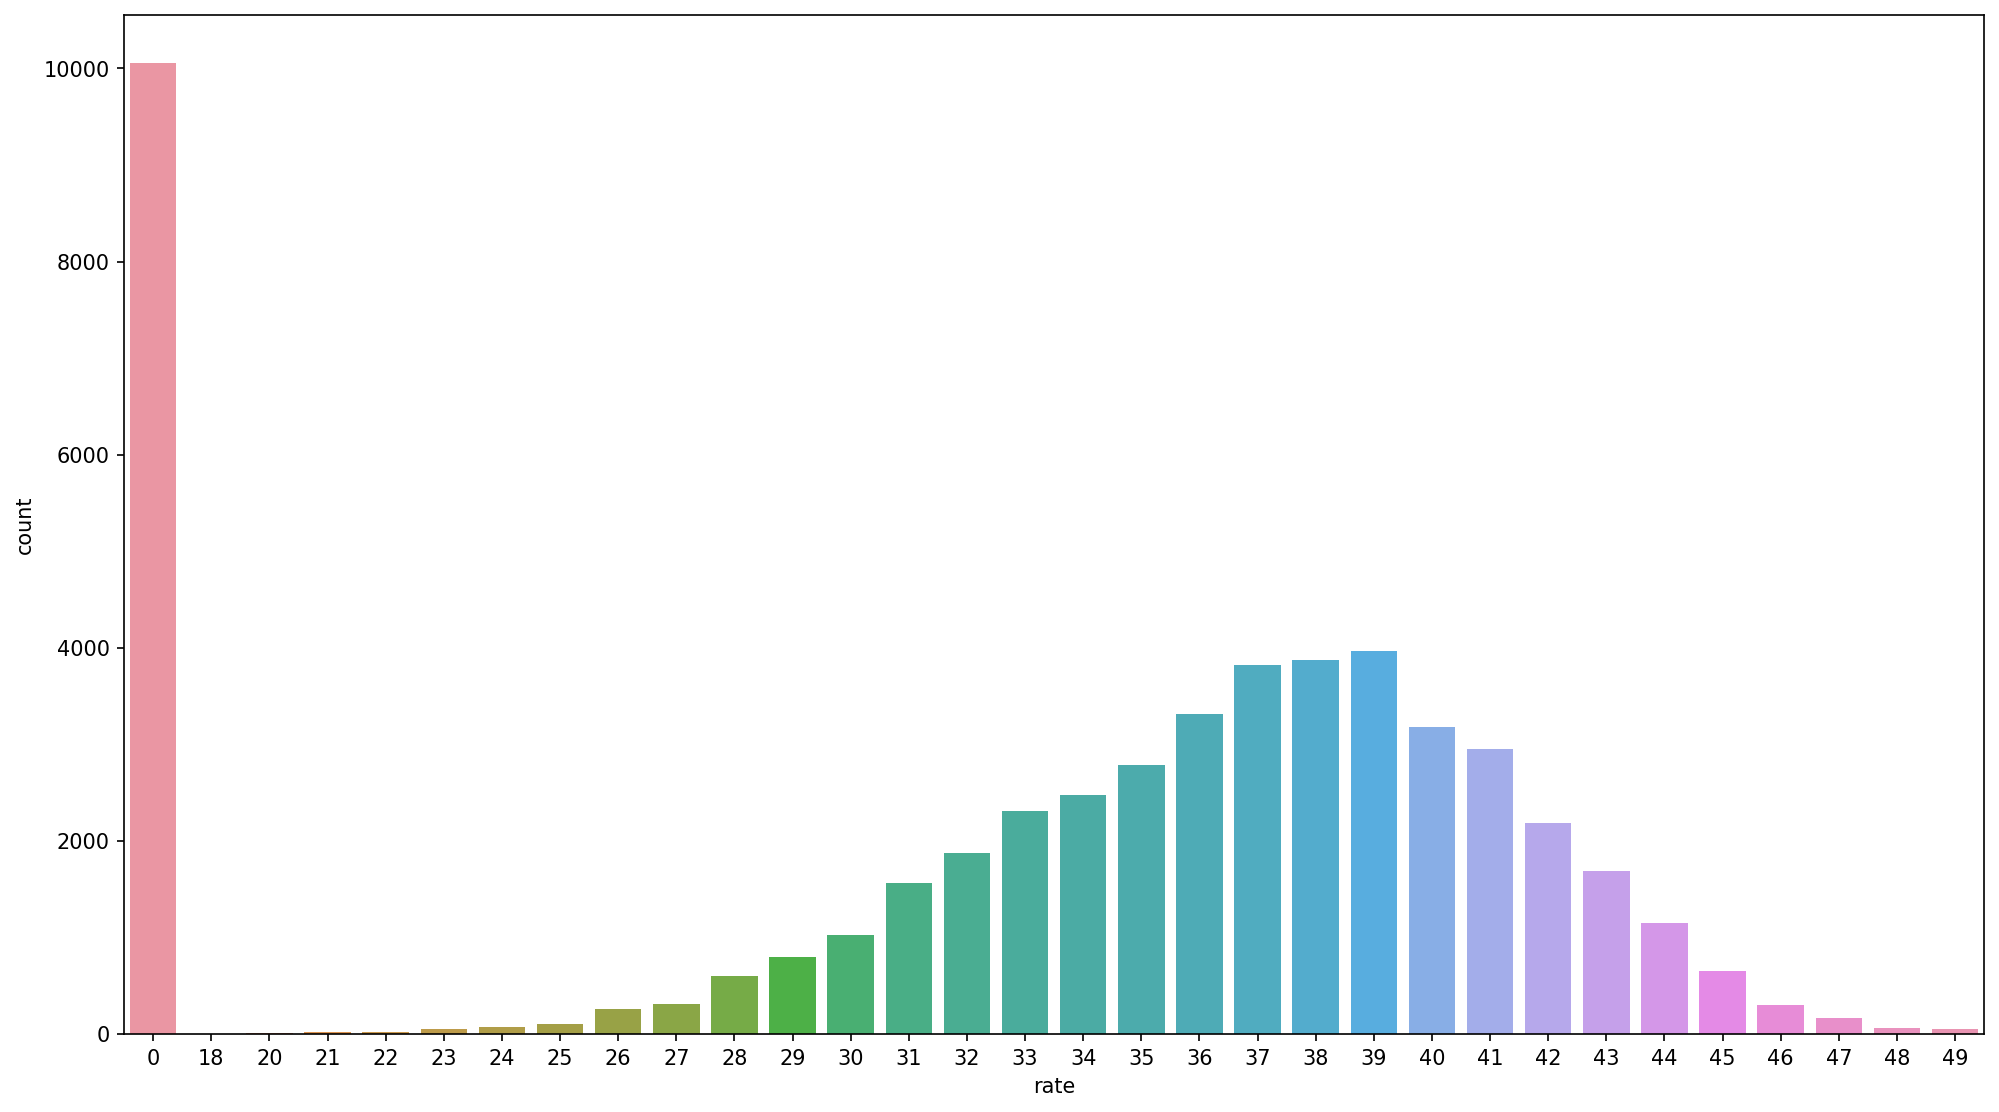

In [87]:
sns.countplot(zomato.rate)

In [ ]:
#analyzing the number of restaurants in a loctions
zomato.location.value_counts().nlargest(10).plot(kind="barh",color='g')

In [113]:
#replacing yes and no with 0,1
zomato.online_order = zomato.online_order.map(dict(Yes=1,No=0))
zomato.book_table = zomato.book_table.map(dict(Yes=1, No=0))

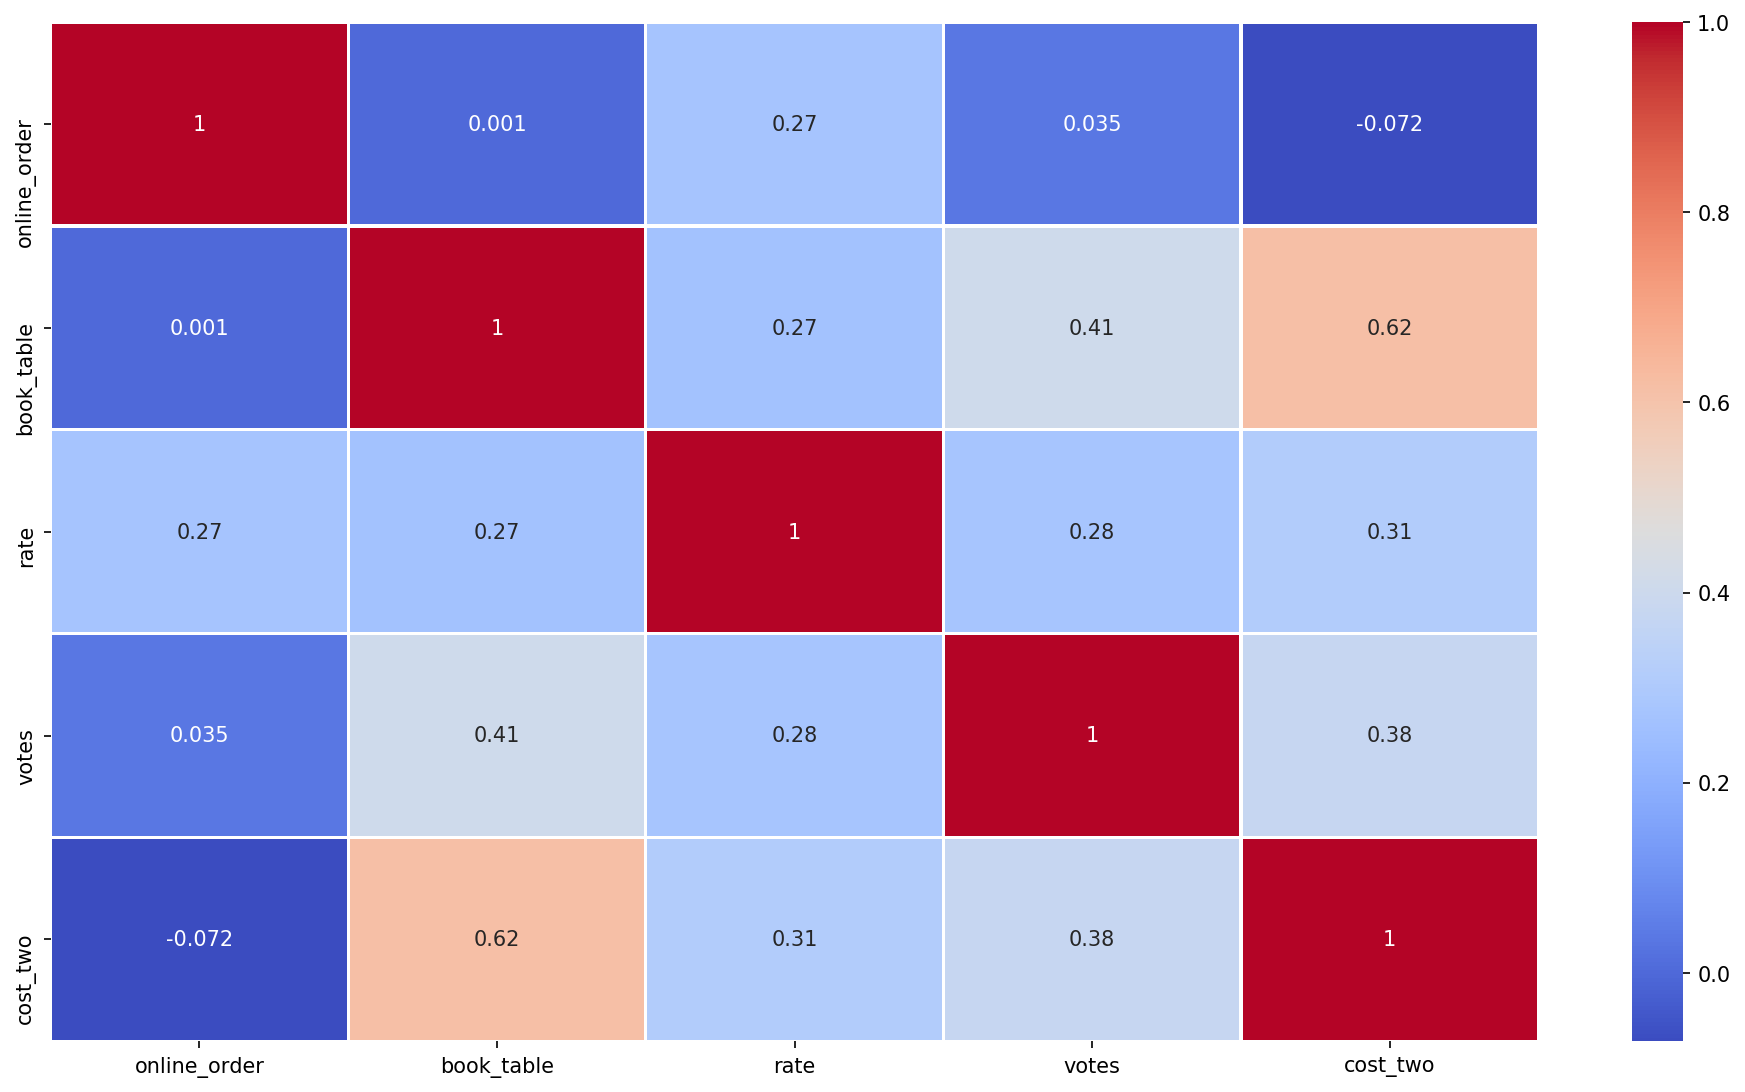

In [115]:
sns.heatmap(zomato.corr(),cmap="coolwarm",linewidths=1,annot=True)

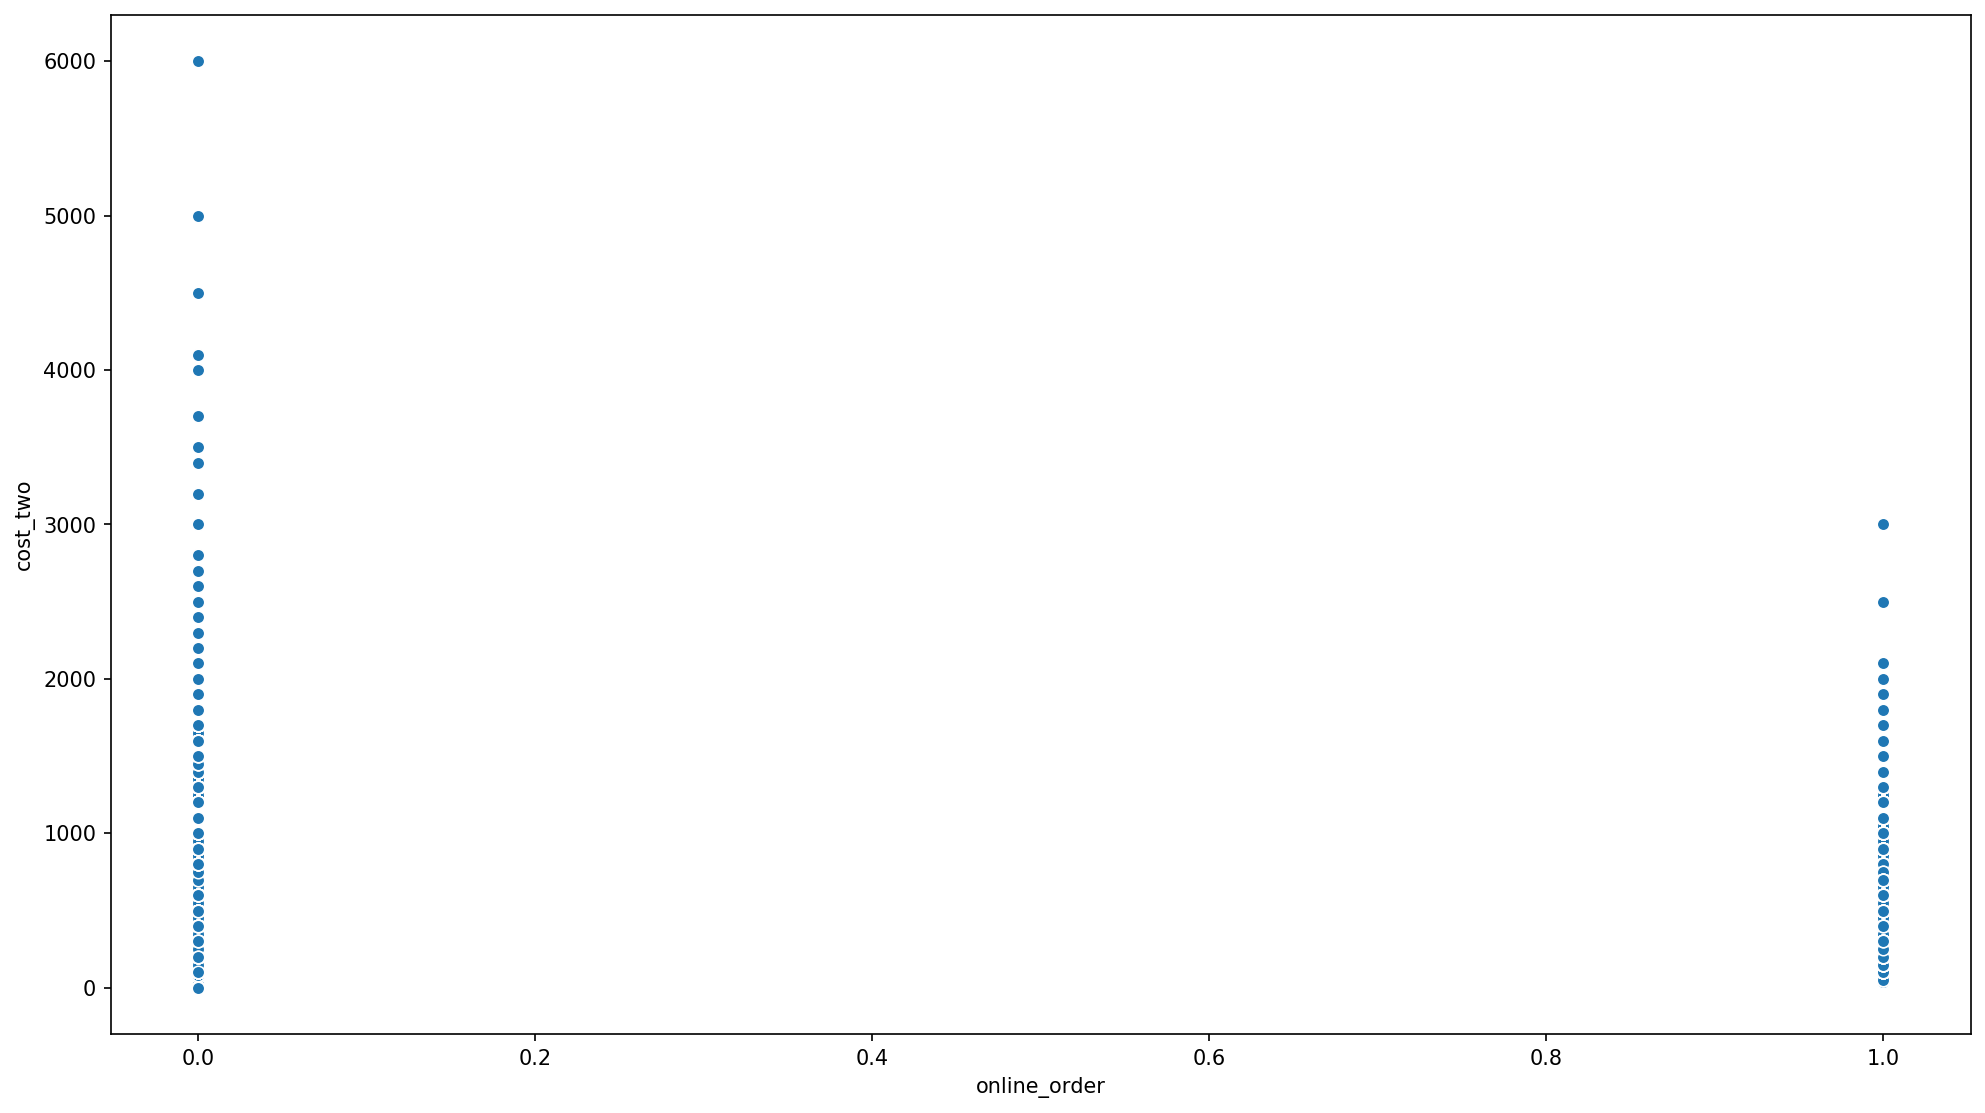

In [116]:
sns.scatterplot(zomato.online_order,zomato.cost_two)